In [31]:
import numpy as np
import h5py
from scipy.optimize import curve_fit
import extra_geom
from scipy import signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [22]:
# define things
geometry_file = "./2021_EU_XFEL_Hamburg/Geometry/agipd_2746_v1.geom"

In [19]:
# define kartiks functions
def assem_mod(mod):
    assert mod.shape == (512, 128)
    assem = np.zeros((526, 128), dtype=mod.dtype)
    for i in range(8):
        assem[i*66:i*66+64] = mod[i*64:(i+1)*64]
    return assem
    
def normalize(corr, powder):
    apowder = np.array([assem_mod(mod) for mod in powder])
    cq = np.array([signal.fftconvolve(mod, mod[::-1,::-1]) for mod in apowder])
    return corr / cq

def extract_mod(corr, center=False):
    if center:
        return corr[:,301:813,63:191]
    else:
        return corr[:,269:781,63:191]

def plot_corrdet(corrdet, geom, vmax=None):
    import pylab as P
    geom = extra_geom.AGIPD_1MGeometry.from_crystfel_geom(geom)
    assem = geom.position_modules_fast(corrdet)[0]

    P.figure(figsize=(10,12))

    vmax = None if vmax is None else np.abs(vmax)
    vmin = None if vmax is None else -0.1*np.abs(vmax)
    im = P.imshow(assem[:,::-1], vmax=vmax, vmin=vmin)

    P.gca().set_facecolor('dimgray')
    P.colorbar(im, fraction=0.046*assem.shape[0]/assem.shape[1], pad=0.04)
    P.tight_layout()
    P.show()



In [20]:
# load data set
with h5py.File("./2021_EU_XFEL_Hamburg/Correlations/r0102_corr.h5", 'r') as f:
    corr = f['data/corr'][:]
    powderc = f['data/powder'][:]

In [37]:
# evaluate things
ncorr = normalize(corr, powderc)
# corrdet = extract_mod(ncorr, False)

# plot_corrdet(corrdet, geometry_file, 3.0)

C:\Users\Stefan\AppData\Local\Temp/ipykernel_17088/1023453868.py:12: RuntimeWarning: invalid value encountered in true_divide
  return corr / cq


<IPython.core.display.Javascript object>


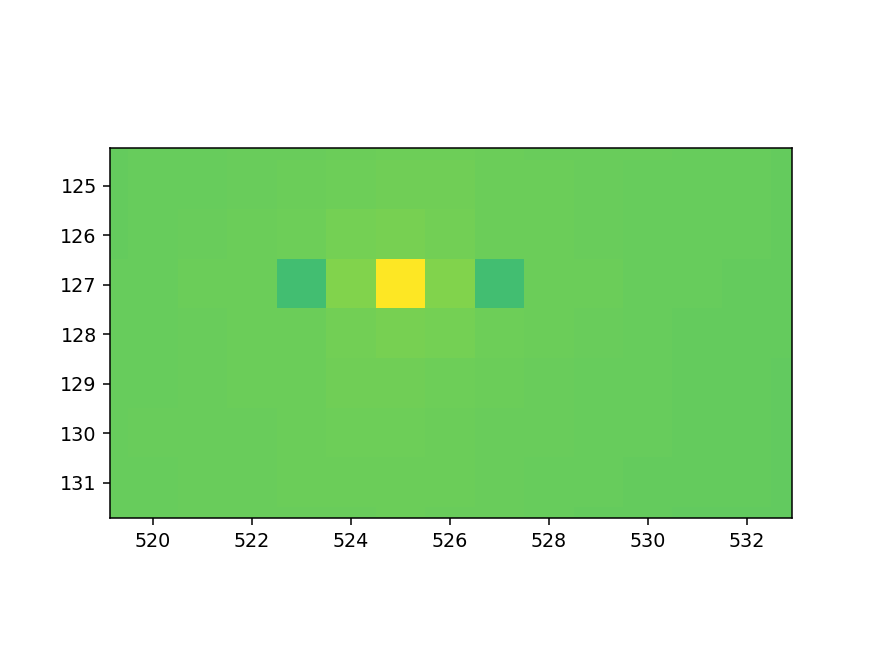

In [38]:
plt.figure()
plt.imshow(ncorr[3].T, vmin=0, vmax=3)
plt.show()